<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Fitting 1D variogram </font>
</div>

- **Fecha**: 2023/03/31
        
- **Objetivos**: fitting to all the stored variograms

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 100

In [4]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_1D import experimental, theoretical, fitting, variogram_types, print_types

# Experimental variogram 

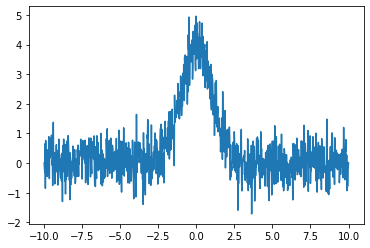

In [5]:
sc_initial = .5

x = np.linspace(-10, 10, 1000)
y = 4 * np.exp(-x**2 / (2 * 1**2)) + sc_initial * np.random.randn(len(x))

i_points = np.arange(0, 250)

plt.plot(x, y)

In [6]:
var_exp = experimental(x, y)
var_exp.compute(i_points)
var_exp.draw()


# Optimizacion por PSO

In [7]:
tipos = print_types()

constant
gauss
exponential
spherical
cubic


In [18]:
variogramas=[]
cost_values = np.zeros(len(tipos))

i_fitting_best = 0
cost_best=1e10

for i, tipo in enumerate(tipos):
    print(tipo)
    fitting1 = fitting(type=tipo, var_exp=var_exp)
    cost, var_final, optimizer = fitting1.execute()
    cost_values[i] = cost
    variogramas.append(fitting1.var_theo)

    if cost<cost_best:
        cost_best = cost
        i_fitting_best = i
        variogram_best = fitting1

    print(fitting1.cost)

2023-06-27 11:48:02,883 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


constant


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.641
2023-06-27 11:48:04,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6412940665514129, best pos: [ 1.1626  4.9701 11.2293]
2023-06-27 11:48:04,783 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.6412940665514129
gauss


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0157
2023-06-27 11:48:06,735 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01572789234958292, best pos: [0.5229 1.8388 2.3438]
2023-06-27 11:48:06,745 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.01572789234958292
exponential


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0775
2023-06-27 11:48:08,807 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.07748326578867712, best pos: [0.0684 3.1626 4.0537]
2023-06-27 11:48:08,816 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.07748326578867712
spherical


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0519
2023-06-27 11:48:11,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.05189957761663293, best pos: [0.2076 2.073  4.9282]
2023-06-27 11:48:11,584 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.05189957761663293
cubic


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0187
2023-06-27 11:48:14,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.018659686895577128, best pos: [0.5132 1.8166 5.5092]


0.018659686895577128


In [19]:
print(cost_values)

[0.6413 0.0157 0.0775 0.0519 0.0187]


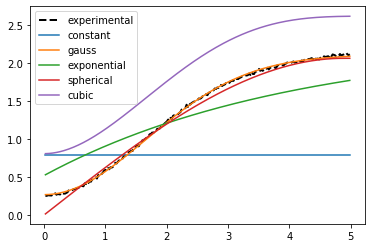

In [32]:
plt.plot(var_exp.h, var_exp.variogram, 'k--', lw=2, label='experimental')

for v in variogramas:
    h = v.h
    var = v.variogram
    plt.plot(v.h, v.variogram, label=v.type)

plt.legend()

In [21]:
print(cost_values)

[0.6413 0.0157 0.0775 0.0519 0.0187]


In [22]:
print(cost_best)
print(i_fitting_best)
print(variogram_best)


0.01572789234958292
1


In [23]:
print(variogram_best.param_final)
print(variogram_best.params_dict)

[0.5229 1.8388 2.3438]
{'sc': 0.522901682536604, 'A': 1.838793847754693, 'lc': 2.3438285843267477, 'power': 2.0}


In [26]:
print(variogram_best.type_variogram)

gauss


In [30]:
variogram_best.draw_fitting()
plt.title(variogram_best.type_variogram)

In [34]:
print(var_final)

[0.5132 1.8166 5.5092 2.    ]


In [33]:
for i in fitting1.pso_params:
    print("{}: {}".format(i, fitting1.pso_params[i]))

bounds: (array([0, 0, 0]), array([ 2,  5, 20]))
options: {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
num_transitions: 3
num_iters: 200
num_particles: 100
